importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [2]:
#loading and reading the datasets
hiring=pd.read_csv('hiring.csv')
hiring.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [3]:
#checking for null values
hiring.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [4]:
#renaming some columns
hiring.columns=['experience','test_score','interview','salary']
hiring.columns

Index(['experience', 'test_score', 'interview', 'salary'], dtype='object')

In [5]:
hiring.head()

,experience,test_score,interview,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [6]:
#data cleaning, checking for the median in the test_score
import math
median_test_score=math.floor(hiring.test_score.median())
median_test_score

8

In [7]:
#filling the null value with the median
hiring.test_score=hiring.test_score.fillna(median_test_score)
hiring.test_score

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     8.0
7     7.0
Name: test_score, dtype: float64

In [8]:
#filling the null values in the experience column with zero
hiring.experience=hiring.experience.fillna('zero')

In [ ]:
#how to convert from words to digits
pip install word2number

In [11]:
from word2number import w2n

In [13]:
#conevrting all numbers in experience section to digits
hiring.experience = hiring.experience.apply(w2n.word_to_num)

In [14]:
hiring.head(10)

,experience,test_score,interview,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


### visualization

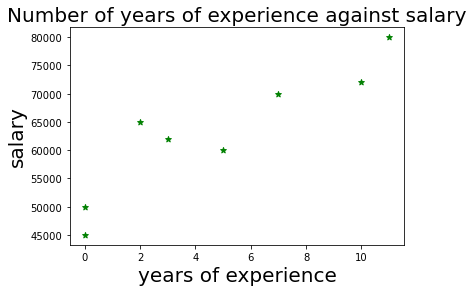

In [25]:
plt.xlabel('years of experience',fontsize=20)
plt.ylabel('salary',fontsize=20)
plt.scatter(hiring['experience'],hiring.salary,color='green',marker='*');
plt.title('Number of years of experience against salary',fontsize=20);
            

From th graph, it is observed that the higher the number of expericne, the bigger the salary

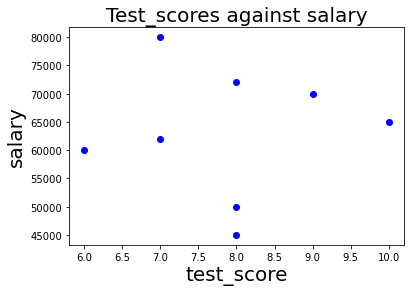

In [24]:
plt.xlabel('test_score',fontsize=20)
plt.ylabel('salary',fontsize=20)
plt.scatter(hiring['test_score'],hiring.salary,color='blue',marker='o');
plt.title('Test_scores against salary',fontsize=20);

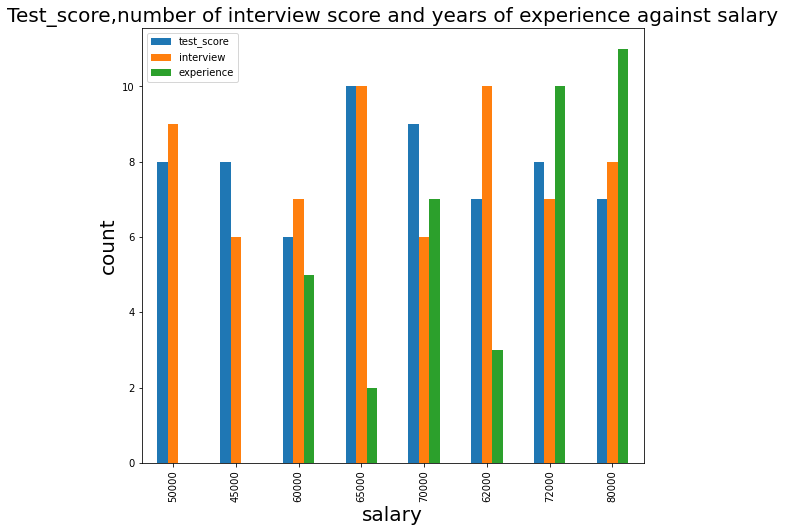

In [27]:
#ploting multiple columns against one column
df=pd.DataFrame(hiring,columns=['salary','test_score','interview','experience'])
df.plot(x='salary',y=['test_score','interview','experience'],kind='bar',figsize=(9,8));
plt.xlabel('salary',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('Test_score,number of interview score and years of experience against salary', fontsize=20);

# From the analysis, it can infered that the decising factor for a higher salary is the years of experience. Though the number of interview and the test_score passed also contribute, the employer is more interested in candidate with greater level of experience.

Buliding a machine learning model for HR department to help them decide the salary for future candidates

In [17]:
#training the model: 
reg=linear_model.LinearRegression()
reg.fit(hiring[['experience','test_score','interview']],hiring.salary)

LinearRegression()

In [18]:
#predicting salary for a candidate with two years of experience, 9 test_scores and passed 6 interviews score
reg.predict([[2,9,6]])

C:\Users\juliy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [19]:
#predicting salary for a candidate with two years of experience, 9 test_scores and passed 6 interviews score
reg.predict([[12,10,10]])

C:\Users\juliy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

###### To validate our mode, we will use the linear Regression equation


In [20]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [21]:
reg.intercept_

17737.26346433771

y=mx+c
salary=[coeffient(experience,test_score,interview)]+slope

In [22]:
salary=1845.70596798*12+2205.24017467*10+2812.95487627*10+17737.263464337695
salary

90067.68558949769